In [2]:
%load_ext watermark
%watermark -a Chan -d -v -p numpy,pandas,sklearn,konlpy,tensorflow,matplotlib,imblearn

Chan 2019-08-20 

CPython 3.7.3
IPython 7.6.1

numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
konlpy 0.5.1
tensorflow 1.14.0
matplotlib 3.1.0
imblearn 0.5.0


Using TensorFlow backend.


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt
import tensorflow as tf
from tensorflow.python.keras.preprocessing import sequence
from tensorflow import keras
from tqdm import tqdm
from collections import Counter
from matplotlib import pyplot as plt
import pickle
from utils import morp_preprocessing

# Load datasets

In [4]:
datasets = pd.read_csv('../../data/train.csv', engine='python', encoding='utf-16')
datasets.head()

,Unnamed: 0,comment,url_id,label
0,0,ㅜㅜ,77,0
1,1,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,17,0
2,2,헐,52,0
3,3,제시,75,0
4,4,이거인 듯,18,0


In [5]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 4 columns):
Unnamed: 0    42000 non-null int64
comment       42000 non-null object
url_id        42000 non-null int64
label         42000 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


# 형태소분석

In [6]:
chat = morp_preprocessing.chat_to_morp(datasets.comment)

C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)
100%|███████████████████████████████████████████████████████████████████████████| 42000/42000 [01:09<00:00, 605.36it/s]


In [7]:
chat

array([[239,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [271,   0,   0, ...,   0,   0,   0],
       ...,
       [612,   5, 200, ...,  15,   2,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [ 61,  27,  61, ...,  95,   0,   0]])

In [8]:
def plot_loss(history):
    plt.figure(figsize=(6,5))
    val = plt.plot(history.epoch, history.history['val_loss'],
                 '--', label='Test')
    plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(),
           label='Train')

    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.legend()

    plt.xlim([0,max(history.epoch)])

In [9]:
import warnings
warnings.filterwarnings(action='once')


# 데이터 클래스 불균형 문제 해결하자

In [10]:
X_train, X_test, y_train, y_test = train_test_split(chat, datasets.label)

In [11]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [19]:
up_X, up_y = RandomOverSampler().fit_resample(X_train, y_train)

# 총 데이터 수 , 1 레이블 데이터 수
len(up_y), up_y.sum()

(59884, 29942)

In [20]:
model_up = keras.Sequential([
    keras.layers.Embedding(30000, 10),
    keras.layers.Conv1D(64, 4, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, padding="same", activation=tf.nn.relu),
    keras.layers.GlobalMaxPool1D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation=tf.nn.sigmoid)
])

Train on 59884 samples, validate on 10500 samples
Epoch 1/2


12640/59884 [=====>........................] - ETA: 1:38:28 - loss: 0.6570 - recall_3: 0.937 - ETA: 33:23 - loss: 0.3293 - recall_3: 0.9479  - ETA: 20:21 - loss: 0.2307 - recall_3: 0.962 - ETA: 14:45 - loss: 0.2199 - recall_3: 0.955 - ETA: 10:31 - loss: 0.2267 - recall_3: 0.940 - ETA: 8:15 - loss: 0.2085 - recall_3: 0.947 - ETA: 7:15 - loss: 0.2112 - recall_3: 0.94 - ETA: 6:29 - loss: 0.2024 - recall_3: 0.94 - ETA: 5:53 - loss: 0.2142 - recall_3: 0.94 - ETA: 5:24 - loss: 0.2035 - recall_3: 0.94 - ETA: 5:01 - loss: 0.1941 - recall_3: 0.94 - ETA: 4:31 - loss: 0.2061 - recall_3: 0.94 - ETA: 4:15 - loss: 0.2049 - recall_3: 0.94 - ETA: 3:54 - loss: 0.2044 - recall_3: 0.94 - ETA: 3:36 - loss: 0.2073 - recall_3: 0.94 - ETA: 3:27 - loss: 0.2115 - recall_3: 0.93 - ETA: 3:18 - loss: 0.2113 - recall_3: 0.93 - ETA: 3:11 - loss: 0.2085 - recall_3: 0.93 - ETA: 3:00 - loss: 0.2009 - recall_3: 0.94 - ETA: 2:54 - loss: 0.2005 - recall_3: 0.94 - ETA: 2:50 - loss: 0.1999 - recall_3: 0.94 - ETA: 2:45 - lo

26016/59884 [============>.................] - ETA: 53s - loss: 0.1980 - recall_3: 0.940 - ETA: 52s - loss: 0.1998 - recall_3: 0.940 - ETA: 52s - loss: 0.1999 - recall_3: 0.940 - ETA: 52s - loss: 0.2001 - recall_3: 0.940 - ETA: 52s - loss: 0.2003 - recall_3: 0.940 - ETA: 52s - loss: 0.2006 - recall_3: 0.940 - ETA: 52s - loss: 0.2016 - recall_3: 0.939 - ETA: 52s - loss: 0.2012 - recall_3: 0.939 - ETA: 51s - loss: 0.2009 - recall_3: 0.939 - ETA: 51s - loss: 0.2019 - recall_3: 0.939 - ETA: 51s - loss: 0.2016 - recall_3: 0.939 - ETA: 51s - loss: 0.2024 - recall_3: 0.939 - ETA: 51s - loss: 0.2024 - recall_3: 0.939 - ETA: 51s - loss: 0.2024 - recall_3: 0.939 - ETA: 51s - loss: 0.2024 - recall_3: 0.939 - ETA: 50s - loss: 0.2023 - recall_3: 0.939 - ETA: 50s - loss: 0.2018 - recall_3: 0.939 - ETA: 50s - loss: 0.2016 - recall_3: 0.939 - ETA: 50s - loss: 0.2021 - recall_3: 0.938 - ETA: 50s - loss: 0.2021 - recall_3: 0.938 - ETA: 50s - loss: 0.2024 - recall_3: 0.938 - ETA: 50s - loss: 0.2024 - rec

38784/59884 [==================>...........] - ETA: 33s - loss: 0.1982 - recall_3: 0.940 - ETA: 33s - loss: 0.1980 - recall_3: 0.940 - ETA: 32s - loss: 0.1980 - recall_3: 0.940 - ETA: 32s - loss: 0.1979 - recall_3: 0.940 - ETA: 32s - loss: 0.1979 - recall_3: 0.940 - ETA: 32s - loss: 0.1989 - recall_3: 0.940 - ETA: 32s - loss: 0.1988 - recall_3: 0.940 - ETA: 32s - loss: 0.1985 - recall_3: 0.940 - ETA: 32s - loss: 0.1986 - recall_3: 0.940 - ETA: 32s - loss: 0.1984 - recall_3: 0.940 - ETA: 32s - loss: 0.1984 - recall_3: 0.940 - ETA: 32s - loss: 0.1983 - recall_3: 0.940 - ETA: 32s - loss: 0.1982 - recall_3: 0.940 - ETA: 32s - loss: 0.1984 - recall_3: 0.940 - ETA: 32s - loss: 0.1982 - recall_3: 0.940 - ETA: 32s - loss: 0.1981 - recall_3: 0.940 - ETA: 31s - loss: 0.1982 - recall_3: 0.940 - ETA: 31s - loss: 0.1981 - recall_3: 0.940 - ETA: 31s - loss: 0.1980 - recall_3: 0.940 - ETA: 31s - loss: 0.1978 - recall_3: 0.940 - ETA: 31s - loss: 0.1978 - recall_3: 0.940 - ETA: 31s - loss: 0.1977 - rec

52384/59884 [=========================>....] - ETA: 19s - loss: 0.1977 - recall_3: 0.940 - ETA: 19s - loss: 0.1977 - recall_3: 0.940 - ETA: 19s - loss: 0.1976 - recall_3: 0.940 - ETA: 19s - loss: 0.1976 - recall_3: 0.940 - ETA: 19s - loss: 0.1977 - recall_3: 0.940 - ETA: 19s - loss: 0.1976 - recall_3: 0.940 - ETA: 19s - loss: 0.1976 - recall_3: 0.940 - ETA: 19s - loss: 0.1977 - recall_3: 0.940 - ETA: 19s - loss: 0.1979 - recall_3: 0.940 - ETA: 19s - loss: 0.1978 - recall_3: 0.940 - ETA: 18s - loss: 0.1976 - recall_3: 0.940 - ETA: 18s - loss: 0.1977 - recall_3: 0.940 - ETA: 18s - loss: 0.1975 - recall_3: 0.940 - ETA: 18s - loss: 0.1975 - recall_3: 0.940 - ETA: 18s - loss: 0.1975 - recall_3: 0.940 - ETA: 18s - loss: 0.1974 - recall_3: 0.940 - ETA: 18s - loss: 0.1973 - recall_3: 0.940 - ETA: 18s - loss: 0.1973 - recall_3: 0.940 - ETA: 18s - loss: 0.1975 - recall_3: 0.940 - ETA: 18s - loss: 0.1975 - recall_3: 0.940 - ETA: 18s - loss: 0.1980 - recall_3: 0.940 - ETA: 18s - loss: 0.1977 - rec

59884/59884 [==============================] - ETA: 6s - loss: 0.1993 - recall_3: 0.93 - ETA: 6s - loss: 0.1994 - recall_3: 0.93 - ETA: 6s - loss: 0.1994 - recall_3: 0.93 - ETA: 6s - loss: 0.1993 - recall_3: 0.93 - ETA: 6s - loss: 0.1994 - recall_3: 0.93 - ETA: 6s - loss: 0.1993 - recall_3: 0.93 - ETA: 6s - loss: 0.1992 - recall_3: 0.93 - ETA: 6s - loss: 0.1991 - recall_3: 0.93 - ETA: 6s - loss: 0.1992 - recall_3: 0.93 - ETA: 6s - loss: 0.1993 - recall_3: 0.93 - ETA: 6s - loss: 0.1995 - recall_3: 0.93 - ETA: 6s - loss: 0.1994 - recall_3: 0.93 - ETA: 6s - loss: 0.1994 - recall_3: 0.93 - ETA: 5s - loss: 0.1993 - recall_3: 0.93 - ETA: 5s - loss: 0.1996 - recall_3: 0.93 - ETA: 5s - loss: 0.1995 - recall_3: 0.93 - ETA: 5s - loss: 0.1995 - recall_3: 0.93 - ETA: 5s - loss: 0.1994 - recall_3: 0.93 - ETA: 5s - loss: 0.1993 - recall_3: 0.93 - ETA: 5s - loss: 0.1993 - recall_3: 0.93 - ETA: 5s - loss: 0.1994 - recall_3: 0.93 - ETA: 5s - loss: 0.1995 - recall_3: 0.93 - ETA: 5s - loss: 0.1993 - reca

13120/59884 [=====>........................] - ETA: 50s - loss: 0.3324 - recall_3: 0.843 - ETA: 52s - loss: 0.2236 - recall_3: 0.906 - ETA: 55s - loss: 0.1842 - recall_3: 0.931 - ETA: 53s - loss: 0.1587 - recall_3: 0.946 - ETA: 52s - loss: 0.1511 - recall_3: 0.951 - ETA: 51s - loss: 0.1487 - recall_3: 0.954 - ETA: 56s - loss: 0.1593 - recall_3: 0.950 - ETA: 55s - loss: 0.1523 - recall_3: 0.953 - ETA: 55s - loss: 0.1592 - recall_3: 0.949 - ETA: 54s - loss: 0.1552 - recall_3: 0.949 - ETA: 57s - loss: 0.1546 - recall_3: 0.951 - ETA: 56s - loss: 0.1549 - recall_3: 0.951 - ETA: 55s - loss: 0.1605 - recall_3: 0.950 - ETA: 54s - loss: 0.1598 - recall_3: 0.950 - ETA: 53s - loss: 0.1602 - recall_3: 0.950 - ETA: 52s - loss: 0.1674 - recall_3: 0.950 - ETA: 52s - loss: 0.1680 - recall_3: 0.949 - ETA: 52s - loss: 0.1712 - recall_3: 0.948 - ETA: 53s - loss: 0.1731 - recall_3: 0.947 - ETA: 53s - loss: 0.1708 - recall_3: 0.948 - ETA: 53s - loss: 0.1677 - recall_3: 0.949 - ETA: 53s - loss: 0.1651 - rec

25824/59884 [===========>..................] - ETA: 39s - loss: 0.1879 - recall_3: 0.941 - ETA: 39s - loss: 0.1883 - recall_3: 0.941 - ETA: 39s - loss: 0.1877 - recall_3: 0.941 - ETA: 39s - loss: 0.1885 - recall_3: 0.941 - ETA: 39s - loss: 0.1882 - recall_3: 0.941 - ETA: 39s - loss: 0.1878 - recall_3: 0.941 - ETA: 39s - loss: 0.1874 - recall_3: 0.941 - ETA: 39s - loss: 0.1872 - recall_3: 0.941 - ETA: 39s - loss: 0.1881 - recall_3: 0.941 - ETA: 38s - loss: 0.1885 - recall_3: 0.941 - ETA: 38s - loss: 0.1884 - recall_3: 0.941 - ETA: 38s - loss: 0.1878 - recall_3: 0.941 - ETA: 38s - loss: 0.1872 - recall_3: 0.941 - ETA: 38s - loss: 0.1869 - recall_3: 0.941 - ETA: 38s - loss: 0.1867 - recall_3: 0.941 - ETA: 38s - loss: 0.1861 - recall_3: 0.942 - ETA: 38s - loss: 0.1861 - recall_3: 0.942 - ETA: 37s - loss: 0.1858 - recall_3: 0.942 - ETA: 37s - loss: 0.1853 - recall_3: 0.942 - ETA: 37s - loss: 0.1847 - recall_3: 0.942 - ETA: 37s - loss: 0.1842 - recall_3: 0.942 - ETA: 37s - loss: 0.1848 - rec

39808/59884 [==================>...........] - ETA: 29s - loss: 0.1827 - recall_3: 0.942 - ETA: 29s - loss: 0.1827 - recall_3: 0.942 - ETA: 29s - loss: 0.1827 - recall_3: 0.942 - ETA: 29s - loss: 0.1826 - recall_3: 0.942 - ETA: 29s - loss: 0.1824 - recall_3: 0.942 - ETA: 29s - loss: 0.1825 - recall_3: 0.942 - ETA: 29s - loss: 0.1826 - recall_3: 0.942 - ETA: 29s - loss: 0.1824 - recall_3: 0.942 - ETA: 29s - loss: 0.1824 - recall_3: 0.942 - ETA: 29s - loss: 0.1824 - recall_3: 0.942 - ETA: 29s - loss: 0.1823 - recall_3: 0.942 - ETA: 28s - loss: 0.1837 - recall_3: 0.942 - ETA: 28s - loss: 0.1840 - recall_3: 0.942 - ETA: 28s - loss: 0.1839 - recall_3: 0.942 - ETA: 28s - loss: 0.1842 - recall_3: 0.942 - ETA: 28s - loss: 0.1841 - recall_3: 0.942 - ETA: 28s - loss: 0.1842 - recall_3: 0.941 - ETA: 28s - loss: 0.1843 - recall_3: 0.941 - ETA: 28s - loss: 0.1843 - recall_3: 0.941 - ETA: 28s - loss: 0.1846 - recall_3: 0.941 - ETA: 28s - loss: 0.1846 - recall_3: 0.941 - ETA: 28s - loss: 0.1846 - rec

54048/59884 [==========================>...] - ETA: 16s - loss: 0.1870 - recall_3: 0.941 - ETA: 16s - loss: 0.1871 - recall_3: 0.941 - ETA: 16s - loss: 0.1871 - recall_3: 0.941 - ETA: 16s - loss: 0.1870 - recall_3: 0.941 - ETA: 16s - loss: 0.1875 - recall_3: 0.941 - ETA: 16s - loss: 0.1877 - recall_3: 0.941 - ETA: 16s - loss: 0.1880 - recall_3: 0.941 - ETA: 16s - loss: 0.1877 - recall_3: 0.941 - ETA: 16s - loss: 0.1877 - recall_3: 0.941 - ETA: 16s - loss: 0.1876 - recall_3: 0.941 - ETA: 16s - loss: 0.1874 - recall_3: 0.941 - ETA: 16s - loss: 0.1873 - recall_3: 0.941 - ETA: 15s - loss: 0.1873 - recall_3: 0.941 - ETA: 15s - loss: 0.1872 - recall_3: 0.941 - ETA: 15s - loss: 0.1873 - recall_3: 0.941 - ETA: 15s - loss: 0.1873 - recall_3: 0.941 - ETA: 15s - loss: 0.1873 - recall_3: 0.941 - ETA: 15s - loss: 0.1873 - recall_3: 0.941 - ETA: 15s - loss: 0.1871 - recall_3: 0.941 - ETA: 15s - loss: 0.1872 - recall_3: 0.941 - ETA: 15s - loss: 0.1872 - recall_3: 0.941 - ETA: 15s - loss: 0.1872 - rec

10500/10500 [==============================] - ETA: 1s - loss: 0.1715 - recall_3: 0.96 - ETA: 2s - loss: 0.2230 - recall_3: 0.93 - ETA: 2s - loss: 0.2879 - recall_3: 0.93 - ETA: 2s - loss: 0.2752 - recall_3: 0.93 - ETA: 2s - loss: 0.2645 - recall_3: 0.94 - ETA: 2s - loss: 0.2647 - recall_3: 0.94 - ETA: 2s - loss: 0.2498 - recall_3: 0.94 - ETA: 2s - loss: 0.2652 - recall_3: 0.94 - ETA: 2s - loss: 0.2708 - recall_3: 0.94 - ETA: 1s - loss: 0.2647 - recall_3: 0.94 - ETA: 1s - loss: 0.2581 - recall_3: 0.95 - ETA: 1s - loss: 0.2684 - recall_3: 0.94 - ETA: 1s - loss: 0.2680 - recall_3: 0.94 - ETA: 1s - loss: 0.2630 - recall_3: 0.94 - ETA: 1s - loss: 0.2633 - recall_3: 0.94 - ETA: 1s - loss: 0.2596 - recall_3: 0.94 - ETA: 1s - loss: 0.2585 - recall_3: 0.94 - ETA: 1s - loss: 0.2548 - recall_3: 0.94 - ETA: 1s - loss: 0.2540 - recall_3: 0.94 - ETA: 1s - loss: 0.2581 - recall_3: 0.94 - ETA: 1s - loss: 0.2569 - recall_3: 0.94 - ETA: 1s - loss: 0.2555 - recall_3: 0.94 - ETA: 1s - loss: 0.2517 - reca

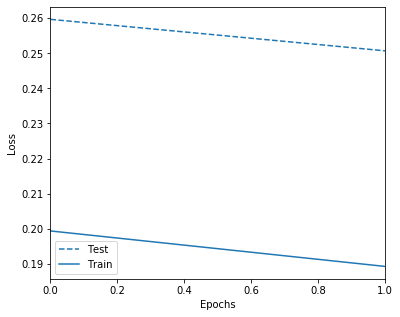

In [26]:
model_up.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

history = model_up.fit(up_X,
          pd.get_dummies(up_y),
          epochs=2,
          validation_data=(X_test, pd.get_dummies(y_test))
         )
plot_loss(history)
test_loss, test_acc = model_up.evaluate(X_test, pd.get_dummies(y_test))
print('Test accuracy:', test_acc)

In [27]:
print('전체채팅수{}, 유해채팅수{}'.format(len(X_test),model_up.predict_classes(X_test).sum()))

전체채팅수10500, 유해채팅수351


### Recall

In [37]:
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score, precision_score

In [38]:
recall_score(y_test, model_up.predict_classes(X_test)),\
accuracy_score(y_test, model_up.predict_classes(X_test)),\
f1_score(y_test, model_up.predict_classes(X_test)),\
confusion_matrix(y_test, model_up.predict_classes(X_test)),\
precision_score(y_test, model_up.predict_classes(X_test)),\

(0.2899628252788104,
 0.945047619047619,
 0.3509561304836895,
 array([[9767,  195],
        [ 382,  156]], dtype=int64),
 0.4444444444444444)

In [25]:
# model_up.save('../model/cnn_oversample.h5')

In [42]:
sum(y_train)

1558

## Downsampling

In [13]:
down_X, down_y = RandomUnderSampler().fit_resample(X_train, y_train)

# 총 데이터 수 , 1 레이블 데이터 수
len(down_y), down_y.sum()

(3116, 1558)

In [14]:
model_down = keras.Sequential([
    keras.layers.Embedding(30000, 10),
    keras.layers.Conv1D(64, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.GlobalMaxPool1D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation=tf.nn.sigmoid)
])

W0820 20:15:08.358269 11676 deprecation.py:506] From C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0820 20:15:08.367264 11676 deprecation.py:506] From C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\tensorflow\python\ops\nn_ops.py:61: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from

Train on 3116 samples, validate on 10500 samples
Epoch 1/6
3116/3116 [==============================] - ETA: 4:55 - loss: 0.0409 - recall_1: 1.00 - ETA: 1:38 - loss: 0.1106 - recall_1: 0.96 - ETA: 58s - loss: 0.2743 - recall_1: 0.9625 - ETA: 41s - loss: 0.2080 - recall_1: 0.973 - ETA: 32s - loss: 0.1933 - recall_1: 0.968 - ETA: 26s - loss: 0.1990 - recall_1: 0.965 - ETA: 20s - loss: 0.2010 - recall_1: 0.957 - ETA: 17s - loss: 0.2056 - recall_1: 0.953 - ETA: 15s - loss: 0.1883 - recall_1: 0.958 - ETA: 14s - loss: 0.1807 - recall_1: 0.959 - ETA: 12s - loss: 0.1852 - recall_1: 0.956 - ETA: 11s - loss: 0.1834 - recall_1: 0.954 - ETA: 10s - loss: 0.1816 - recall_1: 0.951 - ETA: 9s - loss: 0.1773 - recall_1: 0.952 - ETA: 8s - loss: 0.1696 - recall_1: 0.95 - ETA: 8s - loss: 0.1672 - recall_1: 0.95 - ETA: 7s - loss: 0.1635 - recall_1: 0.95 - ETA: 6s - loss: 0.1570 - recall_1: 0.95 - ETA: 6s - loss: 0.1553 - recall_1: 0.95 - ETA: 5s - loss: 0.1533 - recall_1: 0.95 - ETA: 5s - loss: 0.1498 - rec

3116/3116 [==============================] - ETA: 2s - loss: 0.2021 - recall_1: 0.90 - ETA: 2s - loss: 0.1876 - recall_1: 0.95 - ETA: 2s - loss: 0.1367 - recall_1: 0.96 - ETA: 2s - loss: 0.1702 - recall_1: 0.95 - ETA: 2s - loss: 0.1581 - recall_1: 0.96 - ETA: 2s - loss: 0.1446 - recall_1: 0.96 - ETA: 2s - loss: 0.1466 - recall_1: 0.95 - ETA: 2s - loss: 0.1354 - recall_1: 0.95 - ETA: 2s - loss: 0.1331 - recall_1: 0.95 - ETA: 2s - loss: 0.1229 - recall_1: 0.96 - ETA: 2s - loss: 0.1328 - recall_1: 0.96 - ETA: 2s - loss: 0.1329 - recall_1: 0.96 - ETA: 2s - loss: 0.1307 - recall_1: 0.96 - ETA: 2s - loss: 0.1341 - recall_1: 0.96 - ETA: 2s - loss: 0.1348 - recall_1: 0.95 - ETA: 2s - loss: 0.1411 - recall_1: 0.95 - ETA: 2s - loss: 0.1360 - recall_1: 0.95 - ETA: 2s - loss: 0.1325 - recall_1: 0.96 - ETA: 2s - loss: 0.1352 - recall_1: 0.95 - ETA: 2s - loss: 0.1418 - recall_1: 0.95 - ETA: 1s - loss: 0.1410 - recall_1: 0.95 - ETA: 1s - loss: 0.1474 - recall_1: 0.95 - ETA: 1s - loss: 0.1478 - recall

10500/10500 [==============================] - ETA: 1s - loss: 3.0790 - recall_1: 0.71 - ETA: 2s - loss: 2.0788 - recall_1: 0.78 - ETA: 3s - loss: 2.0635 - recall_1: 0.78 - ETA: 3s - loss: 2.0226 - recall_1: 0.80 - ETA: 3s - loss: 1.9601 - recall_1: 0.80 - ETA: 3s - loss: 1.9276 - recall_1: 0.81 - ETA: 2s - loss: 1.8781 - recall_1: 0.81 - ETA: 2s - loss: 1.8171 - recall_1: 0.81 - ETA: 2s - loss: 1.8808 - recall_1: 0.80 - ETA: 2s - loss: 1.8989 - recall_1: 0.80 - ETA: 2s - loss: 1.9334 - recall_1: 0.80 - ETA: 2s - loss: 1.8989 - recall_1: 0.80 - ETA: 2s - loss: 1.8456 - recall_1: 0.81 - ETA: 2s - loss: 1.8582 - recall_1: 0.81 - ETA: 2s - loss: 1.8551 - recall_1: 0.81 - ETA: 2s - loss: 1.8476 - recall_1: 0.81 - ETA: 2s - loss: 1.8764 - recall_1: 0.81 - ETA: 1s - loss: 1.8823 - recall_1: 0.80 - ETA: 2s - loss: 1.8669 - recall_1: 0.80 - ETA: 1s - loss: 1.8620 - recall_1: 0.80 - ETA: 1s - loss: 1.8632 - recall_1: 0.80 - ETA: 1s - loss: 1.8531 - recall_1: 0.80 - ETA: 1s - loss: 1.8646 - reca

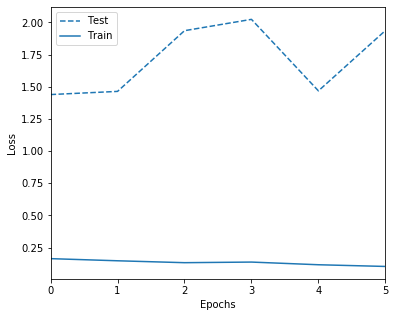

In [17]:
model_down.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

history = model_down.fit(down_X,
          pd.get_dummies(down_y),
          epochs=6,
          validation_data=(X_test, pd.get_dummies(y_test))
         )
plot_loss(history)
test_loss, test_acc = model_down.evaluate(X_test, pd.get_dummies(y_test))
print('Test Recall:', test_acc)

In [18]:
#recall
recall_score(y_test, model_down.predict_classes(X_test)), \
accuracy_score(y_test, model_down.predict_classes(X_test)),\
f1_score(y_test, model_down.predict_classes(X_test))

(0.7118959107806692, 0.8016190476190476, 0.26886626886626885)

In [114]:
print('전체채팅수{}, 유해채팅수{}'.format(len(X_test),model_down.predict_classes(X_test).sum()))

전체채팅수10500, 유해채팅수2138


## 모델 체크포인트 저장

In [115]:
# model_down.save('../model/cnn_undersample.h5')

In [59]:
down_X, down_y = RandomUnderSampler().fit_resample(chat, datasets.label)

# 총 데이터 수 , 1 레이블 데이터 수
len(down_y), down_y.sum()

down_X_train, down_X_test, down_y_train, down_y_test = train_test_split(down_X, down_y)

In [60]:
model_down = keras.Sequential([
    keras.layers.Embedding(30000, 10),
    keras.layers.Conv1D(64, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 3, padding="same", activation=tf.nn.relu),
    keras.layers.GlobalMaxPool1D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation=tf.nn.sigmoid)
])

Train on 3144 samples, validate on 1048 samples
Epoch 1/6
3144/3144 [==============================] - ETA: 3:35 - loss: 0.0555 - recall_6: 0.96 - ETA: 53s - loss: 0.1449 - recall_6: 0.9141 - ETA: 36s - loss: 0.1648 - recall_6: 0.911 - ETA: 27s - loss: 0.1605 - recall_6: 0.921 - ETA: 24s - loss: 0.1670 - recall_6: 0.916 - ETA: 20s - loss: 0.1514 - recall_6: 0.926 - ETA: 18s - loss: 0.1507 - recall_6: 0.927 - ETA: 15s - loss: 0.1438 - recall_6: 0.928 - ETA: 15s - loss: 0.1417 - recall_6: 0.929 - ETA: 12s - loss: 0.1359 - recall_6: 0.934 - ETA: 11s - loss: 0.1298 - recall_6: 0.939 - ETA: 10s - loss: 0.1235 - recall_6: 0.944 - ETA: 9s - loss: 0.1219 - recall_6: 0.945 - ETA: 8s - loss: 0.1157 - recall_6: 0.95 - ETA: 8s - loss: 0.1133 - recall_6: 0.95 - ETA: 7s - loss: 0.1090 - recall_6: 0.95 - ETA: 6s - loss: 0.1063 - recall_6: 0.95 - ETA: 6s - loss: 0.1123 - recall_6: 0.95 - ETA: 6s - loss: 0.1109 - recall_6: 0.95 - ETA: 5s - loss: 0.1128 - recall_6: 0.95 - ETA: 5s - loss: 0.1097 - recall

3144/3144 [==============================] - ETA: 2s - loss: 0.2082 - recall_6: 0.90 - ETA: 2s - loss: 0.1346 - recall_6: 0.93 - ETA: 3s - loss: 0.1671 - recall_6: 0.92 - ETA: 3s - loss: 0.1253 - recall_6: 0.94 - ETA: 3s - loss: 0.1053 - recall_6: 0.95 - ETA: 2s - loss: 0.0990 - recall_6: 0.95 - ETA: 2s - loss: 0.0917 - recall_6: 0.96 - ETA: 2s - loss: 0.0816 - recall_6: 0.96 - ETA: 2s - loss: 0.0795 - recall_6: 0.96 - ETA: 2s - loss: 0.0771 - recall_6: 0.96 - ETA: 2s - loss: 0.0792 - recall_6: 0.96 - ETA: 2s - loss: 0.0832 - recall_6: 0.96 - ETA: 2s - loss: 0.0880 - recall_6: 0.96 - ETA: 2s - loss: 0.0936 - recall_6: 0.96 - ETA: 2s - loss: 0.1023 - recall_6: 0.96 - ETA: 2s - loss: 0.1053 - recall_6: 0.96 - ETA: 2s - loss: 0.1024 - recall_6: 0.96 - ETA: 2s - loss: 0.1042 - recall_6: 0.96 - ETA: 2s - loss: 0.1104 - recall_6: 0.95 - ETA: 2s - loss: 0.1097 - recall_6: 0.95 - ETA: 1s - loss: 0.1097 - recall_6: 0.95 - ETA: 1s - loss: 0.1074 - recall_6: 0.95 - ETA: 1s - loss: 0.1082 - recall

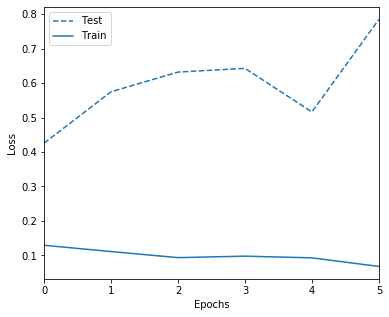

In [67]:
model_down.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

history = model_down.fit(down_X_train,
          pd.get_dummies(down_y_train),
          epochs=6,
          validation_data=(down_X_test, pd.get_dummies(down_y_test))
         )
plot_loss(history)
test_loss, test_acc = model_down.evaluate(down_X_test, pd.get_dummies(down_y_test))
print('Test Recall:', test_acc)

In [72]:
recall_score(down_y_test, model_down.predict_classes(down_X_test)),\
accuracy_score(down_y_test, model_down.predict_classes(down_X_test)),\
f1_score(down_y_test, model_down.predict_classes(down_X_test)),\
precision_score(down_y_test, model_down.predict_classes(down_X_test)),\
confusion_matrix(down_y_test, model_down.predict_classes(down_X_test))


(0.8687872763419483,
 0.8368320610687023,
 0.8363636363636364,
 0.8062730627306273,
 array([[440, 105],
        [ 66, 437]], dtype=int64))